# <a id="Contents"> Contents </a>

* <a href='#1'>**1 - Data Importing** </a>
    * <a href='#1.01'>1.01 - Required Libraries </a>
    * <a href='#1.02'>1.02 - Read in a geodataframe </a>
    * <a href='#1.03'>1.03 - Transform a csv info geo df </a>
    
* <a href='#2'>**2 - Postcode manipulation** </a>
    * <a href='#2.01'>2.01 - Creating AREA column from postcode </a>
    * <a href='#2.02'>2.02 - Creating District column from postcode </a>
    * <a href='#2.03'>2.03 - Creating Sector column from postcode </a>    
    
* <a href='#3'>**2 - CRS** </a>
* <a href='#4'>**3 - Geospatial joins** </a>
* <a href='#5'>**4 - Spatial Methods** </a>
    * <a href='#4.01'>4.01 - Within, contains, distance </a>
* <a href='#5'>**5 - Visualising geospatial data** </a>
* <a href='#6'>**6 - Choropleths** </a>
    * <a href='#6.01'>6.01 - Plotting using Matplot </a>
    * <a href='#6.02'>6.02 - Plotting using Folium </a>
* <a href='#7'>**7 - Raster Data** </a>
* <a href='#8'>**8 - Plotting datapoints using openmaps** </a>
* <a href='#9'>**9 - Haversine** </a>
    * <a href='#9.01'>9.01 - Haversine package </a>
    * <a href='#9.02'>9.02 - Create Haversine function </a>

# <a id='1'>1 - Importing Packages  </a>

## <a id='1.01'>1.01 - Required libraries</a>

In [ ]:
!pip install geopandas

In [ ]:
import pandas as pd
import numpy as np
import os
import geopandas
import matplotlib.pyplot as plt

## <a id='1.02'>1.02 - Read in a geodataframe </a>

In [ ]:
import geopandas
# Read the Paris districts dataset
districts = geopandas.read_file('data.gpkg')

## <a id='1.03'>1.03 - Transform csv into geo df </a>

In [ ]:
# Read the restaurants csv file into a DataFrame
df = pd.read_csv("paris_restaurants.csv")

# Convert it to a GeoDataFrame
restaurants = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.x, df.y))

# <a id='2'>2 - Postcode manipulation  </a>

## <a id='2.01'>2.01 - Creating Area column from postcode </a>

In [ ]:
flood_df['Area'] = flood_df['Postcode'].str[:2]

## <a id='2.0'>2.02 - Creating District column from postcode </a>

In [ ]:
df['District'] = df.Postcode.apply(lambda s: s.split(' ')[0])

## <a id='2.03'>2.03 - Creating Sector column from postcode </a>

In [ ]:
df['Sector'] = df['Postcode'].str[:-2]

# <a id='3'>3 - CRS  </a>

<i> CoordinatesReferenceSystem(CRS) </i>

In [ ]:
## assigning a crs manually 

#Option 1
gdf.crs = {'init': 'epsg:4326'}

#Option 2
gdf.crs = {'proj': 'longlat', 'datum': 'WGS84', 'no_defs': True}

In [ ]:
# Transforming to another CRS using Theto_crs()method:

# Option 1
gdf2 = gdf.to_crs({'proj': 'longlat', 'datum': 'WGS84', 'no_defs': True})
# Option 2
gdf2 = gdf.to_crs(epsg=4326)

<a href="#Contents">_Return to Contents_</a>

# <a id='3'>3 - Geospatial joins  </a>

SPATIAL JOIN = transferring attributes from one layer to another based on their spatial relationship

In [ ]:
# Join the districts and stations datasets
joined = geopandas.sjoin(stations, districts)

# Inspect the first five rows of the result
print(joined.head())

In [ ]:
# Read the trees and districts data
trees = geopandas.read_file("paris_trees.gpkg")
districts = geopandas.read_file("paris_districts_utm.geojson")

# Merge the 'districts' and 'trees_by_district' dataframes
districts_trees = pd.merge(districts,trees_by_district, how ='left')

<a href="#Contents">_Return to Contents_</a>

# <a id='4'>4 - Spatial Methods  </a>

In [ ]:
# Import the Point geometry - useful for creating a point based on coordinates
from shapely.geometry import Point

eiffel_tower = Point(255422.6, 6250868.9)

In [ ]:
# Use .size() to count the size of groups within geometry
type_counts = restaurants.groupby('type').size()

In [ ]:
# use .loc to specify row label and extract i.e. this is putting out montparnasse

district_montparnasse = districts.loc[52, 'geometry']
resto = restaurants.loc[956, 'geometry']

## <a id='4.01'>4.01 - Within, contains and distances </a>

In [ ]:
# Is the Eiffel Tower located within the Montparnasse district?
print(eiffel_tower.within(district_montparnasse))

# Does the Montparnasse district contains the restaurant?
print(district_montparnasse.contains(resto))

# The distance between the Eiffel Tower and the restaurant?
dist_eiffel = restaurants.distance(eiffel_tower)

# The distance to the closest restaurant
print(dist_eiffel.min())

# Filter by spatial relation or by using calculated distances
cities[cities.within(France)]

restaurants_eiffel = restaurants[dist_eiffel<1000]

# Intersects used to check overlap between two polygons
mask = countries.intersects(amazon)

In [ ]:
# Create density column in districts_and_permits
df['density'] = df.apply(lambda row: row.countofx / row.area, axis = 1)

In [ ]:
# find center of each polygon (centroid)
# return centroid of first point 

print(df.geometry.centroid[0])

In [ ]:
# create 'center` column from the centroid school

df['center'] = df.geometry.centroid

In [ ]:
# Distance between two points 

# import pprint to format dictionary output
import pprint
distances = {} 
for row in df.iterrows():
    vals = row[1]
    key = vals['name']
    ctr = vals['center']
    distances[key] = vals['geometry'].distance(ctr)
pprint.pprint(distances)


In [ ]:
# Buffer operation

point.buffer(distance)

#e.g. area = house.buffer(1000) -> a buffer of 1km from the house

line.buffer(distance)
polygon.buffer(distance)


In [ ]:
## The result of the overlay function also keeps the attribute information of both the geographic regions. That can be very useful for further analysis.
## Example

geopandas.overlay(countries, geologic_regions, how='intersection')

<a href="#Contents">_Return to Contents_</a>

# <a id='5'>5 - Visualising geospatial data  </a>

In [ ]:
# adjusting the colour
countries.plot(color = 'red')

# or if want to adjusted based on attribute values
df.plot(column = 'gdp_per_cap')

In [ ]:
# multi-layered Plot
fig, ax = plt.subplots(figsize=(12, 6))
df.plot(ax=ax)
df2.plot(ax=ax, color='red', markersize=10)
ax.set_axis_off()

In [ ]:
#Use Contextily to add basemaps
import contextily

fig, ax = plt.subplots()
ax.plot(df['x'], df['y'], 'o', markersize = 1)
contextily.add_basemap(ax)
plt.show()

## Plotting using folium

In [1]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Create a Map instance
import folium
m = folium.Map(location=[60.25, 24.8], zoom_start=10, control_scale=True)
m

AttributeError: module 'folium' has no attribute 'basemap'

In [3]:
## Add layers to the map

# Create a Map instance
m = folium.Map(location=[60.20, 24.96],
    zoom_start=12, control_scale=True)

# Add marker
# Run: help(folium.Icon) for more info about icons
folium.Marker(
    location=[60.20426, 24.96179],
    popup='Kumpula Campus',
    icon=folium.Icon(color='green', icon='ok-sign'),
).add_to(m)

#Show map
m


In [ ]:
## GeoJSON data can be added to the map as below
df_gjson.add_to(m)

In [9]:
# Add layer control and display
folium.LayerControl().add_to(m)
display(m)

In [ ]:
# You can save the map as an HTML
outfp = "base_map.html"
m.save(outfp)

More information on Folium 

https://autogis-site.readthedocs.io/en/latest/notebooks/L5/02_interactive-map-folium.html

# <a id='6'>6 - Choropleths  </a>

Choropleths are maps onto which an attribute, a non-spatial variable, is displayed. We encode its values by using a color scheme where each color represents one or a few values.

By changing the schemes you will change the distributed output of data as shown below: scheme = 'quantiles' or 'equal_intervals'

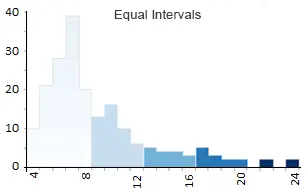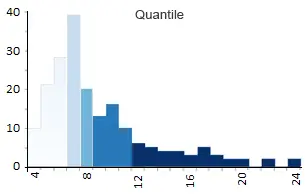

## <a id='6.01'>6.01 - Plotting using matplot</a>

If you wish for addtional colour maps using matplot then list of them - https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
# Make a choropleth of the number of trees 
districts_trees.plot(column = 'n_trees', scheme = 'quantiles', k =7, cmap = 'Purples', edgecolor = 'black', legend = True)
plt.title()
plt.xlabel()
plt.ylabel()
plt.show()

<i> Example of plotting multiple choropleths in same plot <i>

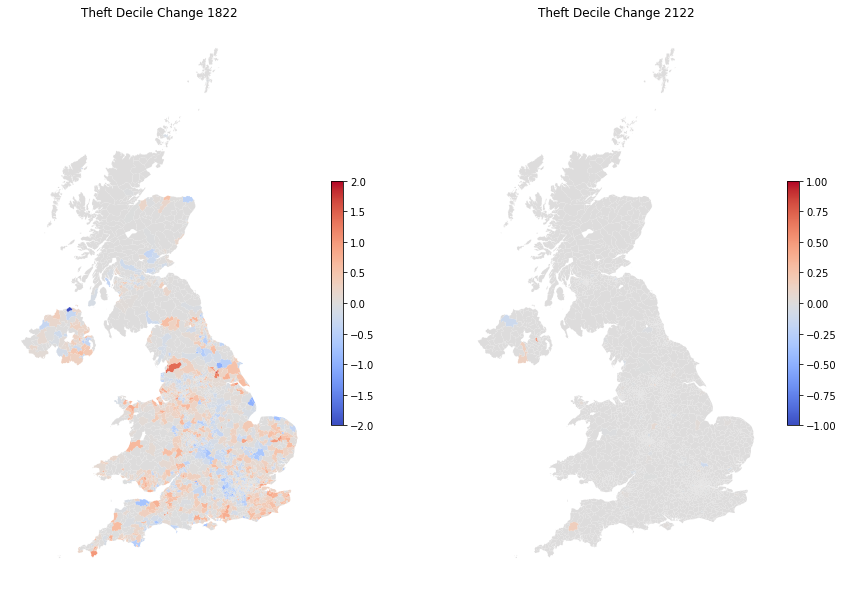

In [26]:
# Theft
fig, ax = plt.subplots(1, 2, figsize=(15, 15))
Exposure_Geo.plot(column = 'Decile_commercial_burglary_change1822', ax=ax[0], cmap = 'coolwarm', vmin = -2, vmax = 2, legend = True, legend_kwds={'shrink': 0.3})
ax[0].set_axis_off()
ax[0].set_title("Theft Decile Change 1822")
Exposure_Geo.plot(column = 'Decile_commercial_burglary_change2122', ax=ax[1], cmap = 'coolwarm',  vmin = -1, vmax = 1, legend = True, legend_kwds={'shrink': 0.3})
ax[1].set_axis_off()
ax[1].set_title("Theft Decile Change 2122")
fig.savefig('BI Theft decile change.png', dpi = 300)

## <a id='6.02'>6.02 - Plotting clorpleths using folium</a>

<font color = 'blue'> You can use folium to plot chloropleths as below example

In [ ]:
# Define a choropleth layer for the map
m.choropleth(
    geo_data=districts_with_counts,
    name='geometry',
    data=df,
    columns=['district','school_density'],
    key_on='feature.properties.district',
    fill_color='YlGn',
    fill_opacity=0.75,
    line_opacity=0.5,
    legend_name='Schools per km squared by School District'
)

Example output

![Capture](geo_methods/Capture.PNG)

More information on Folium 

https://autogis-site.readthedocs.io/en/latest/notebooks/L5/02_interactive-map-folium.html

<a href="#Contents">_Return to Contents_</a>

# <a id='7'>7 - Raster Data  </a>

In [ ]:
## raster package
import rasterio 

In [ ]:
## opening a raster file
import rasterio
src = rasterio.open("DEM_world.tif")

<i>Raster data = numpy array </i>

In [ ]:
# Plotting a raster dataset

rasterio.plot.show(src, cmap='terrain')

Use raster stats to extract rasta values from the data

In [ ]:
# For point vectors
rasterstats.point_query(geometries, "path/to/raster", interpolation='nearest'|'bilinear')

#For Polygon vectors
rasterstats.zonal_stats(geometries, "path/to/raster", stats=['min', 'mean', 'max'])


In [ ]:
result = rasterstats.zonal_stats(countries.geometry, "DEM_gworld.tif", stats=['mean'])
countries['mean_elevation'] = pd.DataFrame(result)
countries.sort_values('mean_elevation', ascending=False).head(

<a href="#Contents">_Return to Contents_</a>

# <a id='8'>8 - Plotting data using open maps  </a>

Unlikely it will be needed - but of interest if have coordinates and no underlying shape file can use openmaps

https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db

<a href="#Contents">_Return to Contents_</a>

# <a id='9'>9 - Haversine </a>

## <a id='9.01'>9.01 - Haversine Package</a>

## <a id='9.02'>9.02 - Haversine Function</a>

Using function to build haversine formula <i><b> Nb </b></i> only really useful if not able to import Geopandas / Haversine

In [ ]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [ ]:
df['distance'] = haversine_np(df['lon1'],df['lat1'],df['lon2'],df['lat2'])

<a href="#Contents">_Return to Contents_</a>